### Ideas for model pruning
1. #### Lottery Ticket Hypothesis revised
As advocated in LTH revised: https://arxiv.org/pdf/1903.01611.pdf, reinitialization to a later checkpoint might help in finding winning tickets.
Experiments: 
   - Keep a new checkpoint on server after first round and use them for reinitialization in future.
   - In LotteryFL train initial model on every client and keep a checkpoint for those weights. In future communications each client uses this checkpoint as a reference for reinitialization thus adding an inductive bias towards their specific task.
   

#### Experiment 1.
- 2 Clients, 1 Server , client caches the global_init_model trained for a single epoch and then uses this for any further   reinitialization. Each client has 5 distinct classes.


In [1]:
import torch
from model.cifar10.cnn import CNN
from torchvision import datasets,transforms
from torch.nn.utils import prune
from torch.utils.data import DataLoader
from util import train,test,copy_model,create_model
from matplotlib import pyplot as plt

%matplotlib
%matplotlib inline

Using matplotlib backend: TkAgg


In [2]:
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
train_dataset = datasets.CIFAR10("./data",train = True,transform = transformations)
test_dataset = datasets.CIFAR10("./data/",train = False,transform = transformations)

In [3]:
model = create_model(CNN)
train_loader = DataLoader(train_dataset,batch_size = 512,shuffle = True)
test_loader = DataLoader(test_dataset,batch_size = 512,shuffle = True)

In [11]:
def L2Distance(model1,model2):
    parameters1 = dict(model1.named_parameters())
    parameters2 = dict(model2.named_parameters())
    buffer1 = dict(model1.named_buffers())
    dist = 0
    for name,param in parameters1.items():
        param1 = param*model1.
    return dist

SyntaxError: invalid syntax (<ipython-input-11-3feec5a9d56e>, line 7)

In [5]:
assert L2Distance(model,model) == 0.0

In [6]:
EPOCHS = 20
loss = []
accuracy = []
l2Distance = []

In [7]:
for i in range(1):
    metrics = train(model,train_loader,1e-3,verbose=True)
    loss.append(metrics["Loss"][0])
    metrics = test(model,test_loader,verbose = True)
    accuracy.append(metrics["Accuracy"][0])


100%|██████████| 98/98 [00:10<00:00,  9.21it/s, loss=1.65, acc=0.369]

|   Accuracy |   Precision |   Recall |      F1 |    Loss |
|------------|-------------|----------|---------|---------|
|    0.31586 |     0.31586 |  0.31586 | 0.31586 | 1.88867 |
  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:01<00:00, 10.42it/s, acc=0.408]
|   Accuracy |   Precision |   Recall |     F1 |
|------------|-------------|----------|--------|
|     0.4078 |      0.4078 |   0.4078 | 0.4078 |


In [8]:
model_1 = copy_model(model)

In [11]:
for i in range(EPOCHS-1):
    metrics = train(model,train_loader,1e-3,verbose=True)
    loss.append(metrics["Loss"][0])
    metrics = test(model,test_loader,verbose = True)
    accuracy.append(metrics["Accuracy"][0])

100%|██████████| 98/98 [00:16<00:00,  6.06it/s, loss=1.49, acc=0.464]|   Accuracy |   Precision |   Recall |     F1 |   Loss |
|------------|-------------|----------|--------|--------|
|     0.4289 |      0.4289 |   0.4289 | 0.4289 | 1.5808 |
  0%|          | 0/98 [00:00<?, ?it/s]
|   Accuracy |   Precision |   Recall |     F1 |
|------------|-------------|----------|--------|
|     0.4552 |      0.4552 |   0.4552 | 0.4552 |
100%|██████████| 98/98 [00:15<00:00,  6.22it/s, loss=1.42, acc=0.479]|   Accuracy |   Precision |   Recall |      F1 |    Loss |
|------------|-------------|----------|---------|---------|
|    0.46028 |     0.46028 |  0.46028 | 0.46028 | 1.49656 |
  0%|          | 0/98 [00:00<?, ?it/s]
|   Accuracy |   Precision |   Recall |    F1 |
|------------|-------------|----------|-------|
|      0.485 |       0.485 |    0.485 | 0.485 |
100%|██████████| 98/98 [00:15<00:00,  6.28it/s, loss=1.4, acc=0.521]|   Accuracy |   Precision |   Recall |      F1 |    Loss |
|----------

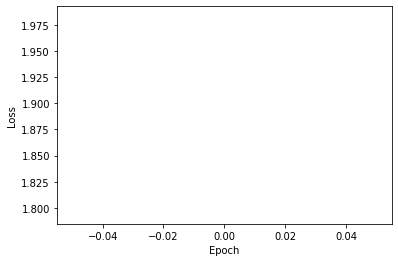

In [9]:
fig = plt.figure()
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

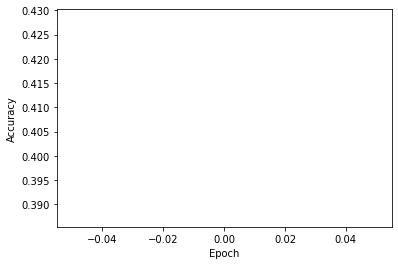

In [10]:
fig = plt.figure()
plt.plot(accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()